# **Project Introduction**
## Predicting Singapore HDB Resale Flat Prices using a Machine Learning Approach

### **Contents**
> * Dataset Description
> * Getting Started
> * Feature Selection
> * Data Extraction, Collection & Preparation
> * Exploratory Data Analysis 
> * Exploring Different Models with Data
> * Extra Features
> * Future Works and Conclusion

# **Dataset Description**

Estimation of HDB Resale Flats Pricing in Singapore using Machine Learning
The dataset comprises of HDB resale transaction prices in Singapore from 2017-2022. Housing Development Board (HDB) has published this housing data containing 10 distinct types of metrics such as month registered for resale, town, flat types, etc. As the data is published by the Singapore government, it is characterized by a high degree of reliability and accuracy.

## Motivation/Problem Statement


This project is crucial in addressing the rising demand for housing in the face of a growing population and escalating costs in land-scarce Singapore. Given the rising concerns about affordability, the project aims to assist individuals in estimating resale flat prices. By doing so, it empowers them to strategically plan and explore housing options that align with their financial constraints and specific preferences. The project's primary focus lies in harnessing and leveraging machine learning techniques to predict resale flat prices accurately.


## Key Questions:

>1. What are the primary factors affecting the price of resale flats in Singapore?
* Identify and analyze the key features that significantly impact resale flat prices, such as floor area, location, and flat model.

>2. Which features should we use for our predictive model?
* Develop and evaluate machine learning models to predict resale flat prices based on location and flat type, and assess their accuracy.

>3. What are some limitations/biases that might occur in the predictive model?
* Number of features might be too little or too many. Additionally, the features provided in the dataset might not be the most meaningful when it comes to predicting resale flat prices

>4. Will the model be able to capture temporal trends in the market?
* This depends on whether we will be using a time-series analysis techniques    

>5. How can this predictive model assist homebuyers and sellers in making informed decisions?
* Explore how the predictive model can be used to provide prospective buyers and sellers with estimated resale flat prices, enabling them to make more informed housing decisions.

By tackling these key questions, this project endeavors to provide a valuable tool for individuals in Singapore, aiding them in navigating the complex housing market with greater precision. Ultimately, the aim is to empower them to make more informed decisions when purchasing or selling resale flats.

# Getting Started

Clone the git repository into your local directory





git clone https://github.com/Cheenaswee/CS3244-Machines-That-Learn.git

# **Data Extraction, Collection & Preparation**

## Unzipping the Datasets.zip file

Running the code will extract the resale_data.csv into the Dataset folder


In [2]:
import os
import zipfile
#If you are using a WINDOWS OS, run the commented out code instead
#zip_directory = r"..\CS3244-Machines-That-Learn\Dataset"
zip_directory = r"../CS3244-Machines-That-Learn/Dataset"
zip_file_path = os.path.join(zip_directory, "resale_flat.zip")
extract_to_directory = r"../CS3244-Machines-That-Learn/Dataset"
#extract_to_directory = r"..\CS3244-Machines-That-Learn\Dataset"


# Check if the zip file exists
if not os.path.exists(zip_file_path):
    print("Error: Zip file does not exist")
    exit()

# Check if the extraction directory exists
if not os.path.exists(extract_to_directory):
    os.makedirs(extract_to_directory)
    print(f"Created extraction directory: {extract_to_directory}")

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(extract_to_directory)
    print("Extraction completed successfully.")

Extraction completed successfully.


# Import Basic Libraries


In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import requests
import re

## Reading in Resale Flat Prices Data

Link to Data: https://www.kaggle.com/datasets/mikelll/singapore-housing-price-20172022

In [2]:
dataset = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\resale_flat.csv")
#dataset = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\resale_flat.csv")


print(dataset)

          month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
134163  2022-08      YISHUN     5 ROOM   850       YISHUN ST 81     01 TO 03   
134164  2022-08      YISHUN  EXECUTIVE   325        YISHUN CTRL     07 TO 09   
134165  2022-08      YISHUN  EXECUTIVE   355     YISHUN RING RD     07 TO 09   
134166  2022-08      YISHUN  EXECUTIVE   355     YISHUN RING RD     07 TO 09   
134167  2022-08      YISHUN  EXECUTIVE   643       YISHUN ST 61     10 TO 12   

        floor_area_sqm      flat_model 

# **Issue: Curse of Dimensionality**

The "curse of dimensionality" refers to the challenges that arise when working with high-dimensional data such as increased computational complexity and difficulty in visualization and interpretation.

Since our features contain both categorical and numerical data, we would have to apply several techniques to make the data more compatible. For numerical data which are far apart, we will normalize the data to ensure that they have similar ranges. For categorical data, we use label encoding to encode the categorical data into numerical values.

Hence, by ploting a histogram we can determine if our data is currently facing issue by examining the shape and the standard deviation of the plot.


Index(['floor_area_sqm', 'lease_commence_date'], dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object')
[[0.05963303 0.24528302 0.         ... 0.1875     0.25       0.32822086]
 [0.16513761 0.22641509 0.         ... 0.         0.6        0.31441718]
 [0.16513761 0.26415094 0.         ... 0.         0.6        0.34815951]
 ...
 [0.54587156 0.41509434 1.         ... 0.125      0.35       0.40184049]
 [0.52752294 0.41509434 1.         ... 0.125      0.35       0.40184049]
 [0.52752294 0.39622642 1.         ... 0.1875     0.35       0.3803681 ]]


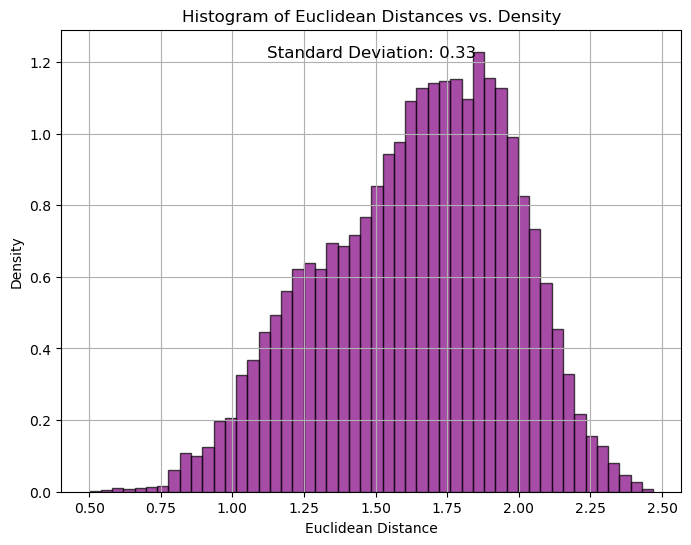

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Filter numeric and categorical columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
categorical_columns = dataset.select_dtypes(exclude=[np.number]).columns

# Remove "resale_price" from numeric columns
numeric_columns = numeric_columns.drop("resale_price")

print(numeric_columns)
print(categorical_columns)

# Label encode categorical columns
label_encoder = LabelEncoder()
encoded_categorical_dataset = dataset[categorical_columns].apply(label_encoder.fit_transform)

# Normalize encoded categorical columns
scaler = MinMaxScaler()  
normalized_categorical_dataset = scaler.fit_transform(encoded_categorical_dataset)

# Normalize numeric columns
scaler = MinMaxScaler()  
normalized_numeric_dataset = scaler.fit_transform(dataset[numeric_columns])

# Concatenate normalized numeric and encoded categorical datasets
normalized_dataset = np.concatenate([normalized_numeric_dataset, normalized_categorical_dataset], axis=1)

print(normalized_dataset)

# Compute Euclidean distances between samples and origin
distances = np.linalg.norm(normalized_dataset, axis=1)

# Calculate standard deviation of Euclidean distances
std_dev = np.std(distances)

# Plot histogram with density
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=50, density=True, edgecolor='black', alpha=0.7, color='purple')
plt.title('Histogram of Euclidean Distances vs. Density')
plt.xlabel('Euclidean Distance')
plt.ylabel('Density')
plt.grid(True)

# Add standard deviation to the plot
plt.text(0.5, 0.95, f'Standard Deviation: {std_dev:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()




From the plot above, we observe that the curve looks normally distributed with a rounded top and that the standard deviation is of an acceptable level. Hence, the dataset is not facing the **'Curse of Dimensionality'**. 
However, we would still like to proceed with feature selection as we feel that some features in the dataset are meaningless/redundant.

# **Feature Selection**

## Convert non-numerical data into numerical
We do feature selection to determine the **Top 5 features** that are most meaningful in our dataset. For our feature selection, we use **Random Forest** and **Recursive Feature Elimination**.  

> Aim:

 1. `Improve Model performance by reducing the risk of overfitting`
 2. `Increase training speed by reducing computational costs`
 3. `Remove redundant features that are not meaningful to us`
 4. `Simplify our model to enhance model interpretibility`



Before we begin, we need to clean up the dataset. For categorical data, we will use **label encoding** to change their values into unique numerical values. By converting non-numerical data into numerical representations, it ensures that our dataset is well-suited for analysis and machine learning model training.  We will also use more creative approaches like finding the average value of the feature or using mathematical formulas to convert alphanumeric values into numerical ones.





In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Load a subset of the dataset
dataset = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\resale_flat.csv")
#dataset = pd.read_csv("..\CS3244-Machines-That-Learn\Dataset\resale_flat.csv")

# Encode categorical features 'town' and 'flat_model'
le_town = LabelEncoder()
dataset['town'] = le_town.fit_transform(dataset['town'])
le_flat_model = LabelEncoder()
dataset['flat_model'] = le_flat_model.fit_transform(dataset['flat_model'])

# Function to convert remaining lease to months
def convert_remaining_lease_to_months(remaining_lease_str):
    parts = remaining_lease_str.split()
    total_months = 0
    
    for i in range(0, len(parts), 2):
        if parts[i+1] == 'years':
            total_months += int(parts[i]) * 12
        elif parts[i+1] == 'months':
            total_months += int(parts[i])
    
    return total_months

# Convert 'remaining_lease' to numerical format in months
dataset['remaining_lease_months'] = dataset['remaining_lease'].apply(convert_remaining_lease_to_months)

# Separate features and target variable
X = dataset.drop(['resale_price', 'month', 'street_name', 'block'], axis=1)  # Drop 'month', 'block' and 'street_name' columns as they will not provide much information
y = dataset['resale_price']


# Encode features 'storey_range', 'flat_type', and 'remaining_lease'

def encode_storey_range(x):
    # Split the input string based on 'TO' and extract the start and end values
    start, end = map(int, x.split(' TO '))
    
    # Calculate the average of the start and end values
    average = (start + end) / 2
    
    return average

def encode_flat_type(x):
    if x.isdigit():
        return int(x)
    elif x.split()[0].isdigit():
        return int(x.split()[0])
    else:
        return np.nan

def encode_remaining_lease(x):
    return int(x.split()[0]) if x.split()[0].isdigit() else np.nan

# Apply encoding functions to the respective columns
X['storey_range_encoded'] = X['storey_range'].apply(encode_storey_range)
X['flat_type_encoded'] = X['flat_type'].apply(encode_flat_type)
X['remaining_lease_encoded'] = X['remaining_lease'].apply(encode_remaining_lease)

# Initialize LabelEncoder for the new encoded features
label_encoders = {}
for column in ['flat_type_encoded', 'remaining_lease_encoded']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column].astype(str))

# Select features for feature selection
selected_features = ['town', 'flat_model', 'flat_type_encoded', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease_encoded', 'storey_range_encoded']

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf, n_features_to_select=5, step=1)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_selected.columns[rfe.support_]

# Print selected features
print(X)
print("Selected Features for feature selection:")
print(selected_features)



        town  flat_type storey_range  floor_area_sqm  flat_model  \
0          0     2 ROOM     10 TO 12            44.0           5   
1          0     3 ROOM     01 TO 03            67.0          12   
2          0     3 ROOM     01 TO 03            67.0          12   
3          0     3 ROOM     04 TO 06            68.0          12   
4          0     3 ROOM     01 TO 03            67.0          12   
...      ...        ...          ...             ...         ...   
134163    25     5 ROOM     01 TO 03           122.0           5   
134164    25  EXECUTIVE     07 TO 09           146.0           7   
134165    25  EXECUTIVE     07 TO 09           150.0           7   
134166    25  EXECUTIVE     07 TO 09           146.0           7   
134167    25  EXECUTIVE     10 TO 12           146.0           7   

        lease_commence_date     remaining_lease  remaining_lease_months  \
0                      1979  61 years 04 months                     736   
1                      1978  60 y

## Finding the best features with **Random Forest** and **Recursive Feature Elimination**

We have obtained the following five features through the process of feature selection.
> Selected Features:

1. `floor_area_sqm`
2. `lease_commerce_date`
3. `town`
4. `storey_range`
5. `flat_model`

## Split the dataset into Training and Testing sets

In [5]:
X = X[['town', 'flat_model', 'floor_area_sqm', 'remaining_lease_months', 'storey_range_encoded']]  #top 5 features
y = dataset['resale_price']  

# Concatenate X with the original dataset
dataset = pd.concat([dataset, X['storey_range_encoded']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(dataset)
print(X_train)


        town  flat_model  floor_area_sqm  remaining_lease_months  \
94720      0          12            68.0                     700   
17774     13           8           105.0                     786   
98807     24           8           100.0                     911   
6943      13          13           115.0                     995   
101357     0           8           137.0                     888   
...      ...         ...             ...                     ...   
110268    13           5           110.0                     941   
119879    13          12            82.0                     755   
103694    24           8           101.0                     916   
131932    24           8            93.0                    1140   
121958    12           8            92.0                    1124   

        storey_range_encoded  
94720                   11.0  
17774                    2.0  
98807                   11.0  
6943                     8.0  
101357                   8.0

## Further split the training set into Training and Validation sets

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#print(X_val)

## Why the need for these different data sets?

The `Training Set` is employed to train the machine learning model by exposing it to labeled data, allowing it to learn patterns and relationships within the data. Through iterative adjustments of its parameters, the model minimizes a chosen loss function, thereby improving its predictive capabilities. 

The `Testing Set` serves as an independent dataset, separate from the training data, used to assess the model's performance after training. By evaluating the model on unseen data, the testing set provides an unbiased estimate of its generalization performance. It helps identify potential issues such as overfitting, ensuring the model's reliability and effectiveness in real-world scenarios.

The `Validation Set` is an additional dataset, distinct from both the training and testing sets, utilized for hyperparameter tuning and model selection. During training, hyperparameters are adjusted based on the model's performance on the validation set, optimizing its performance. By preventing overfitting to the testing set and guiding the selection of the most suitable model, the validation set ensures the model's robustness and generalizability.

This approach is crucial for the development, evaluation, and selection of machine learning models. It facilitates comprehensive learning, unbiased performance assessment and optimization, leading to the creation of effective models capable of robust generalization to unseen data.

# **Exploratory Data Analysis**

## Scatter plot between 'floor_area_sqm' and 'resale_price'

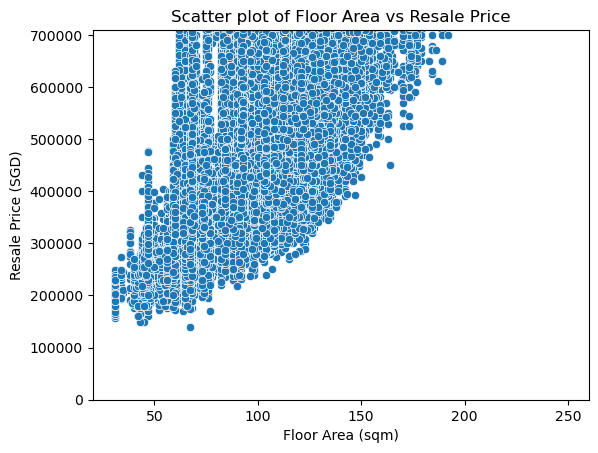

In [7]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=dataset)
plt.title('Scatter plot of Floor Area vs Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD)')

# Adjusting the limits of the y-axis
plt.ylim(0, dataset['resale_price'].max() * 0.5)  # Adjust multiplier as needed
plt.show()

## Scatter plot between 'lease_commence_date' and 'resale_price'

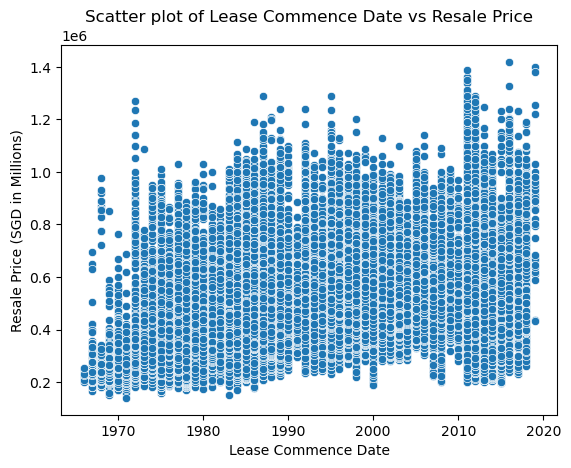

In [8]:
sns.scatterplot(x='lease_commence_date', y='resale_price', data=dataset)
plt.title('Scatter plot of Lease Commence Date vs Resale Price')
plt.xlabel('Lease Commence Date')
plt.ylabel('Resale Price (SGD in Millions)')
plt.show()

## Scatter plot between 'town' and 'resale_price'

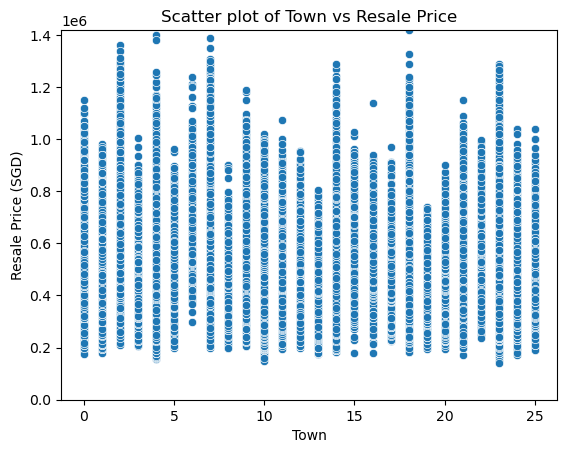

In [9]:
sns.scatterplot(x='town', y='resale_price', data=dataset)
plt.title('Scatter plot of Town vs Resale Price')
plt.xlabel('Town')
plt.ylabel('Resale Price (SGD)')

# Adjusting the limits of the y-axis
plt.ylim(0, dataset['resale_price'].max() * 1)  # Adjust multiplier as needed

plt.show()

## Scatter plot between 'storey_range' and 'resale_price'

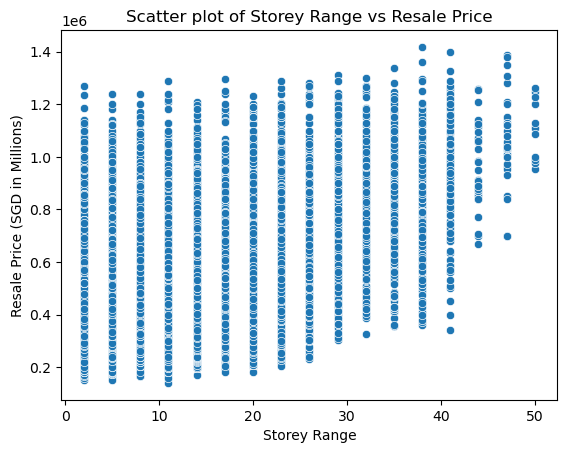

In [10]:
sns.scatterplot(x='storey_range_encoded', y=dataset['resale_price'], data=X)
plt.title('Scatter plot of Storey Range vs Resale Price')
plt.xlabel('Storey Range')
plt.ylabel('Resale Price (SGD in Millions)')
plt.show()


## Scatter plot between 'flat_model' and 'resale_price'

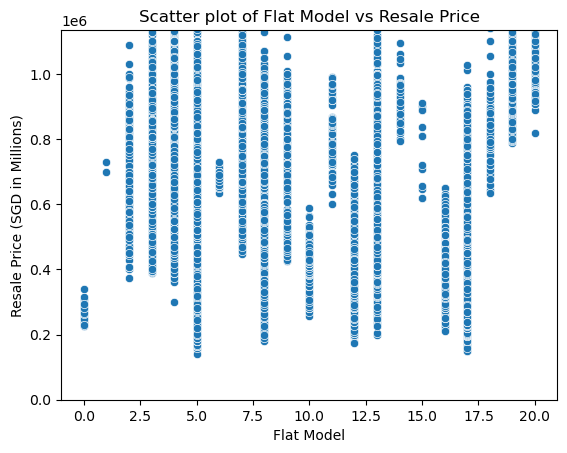

In [11]:
sns.scatterplot(x='flat_model', y='resale_price', data=dataset)
plt.title('Scatter plot of Flat Model vs Resale Price')
plt.xlabel('Flat Model')
plt.ylabel('Resale Price (SGD in Millions)')

# Adjusting the limits of the y-axis
plt.ylim(0, dataset['resale_price'].max() * 0.8)  # Adjust multiplier as needed

plt.show()

## Insights gained from plots

After analyzing the 5 plots provided, it's evident that a clear linear relationship exists between floor area (sqm) vs resale price, flat model vs resale price and storey range vs resale price. However, the remaining 2 plots depicting town and lease_commence_date do not seem to exhibit any discernible relationship with resale price.

## Correlation matrix

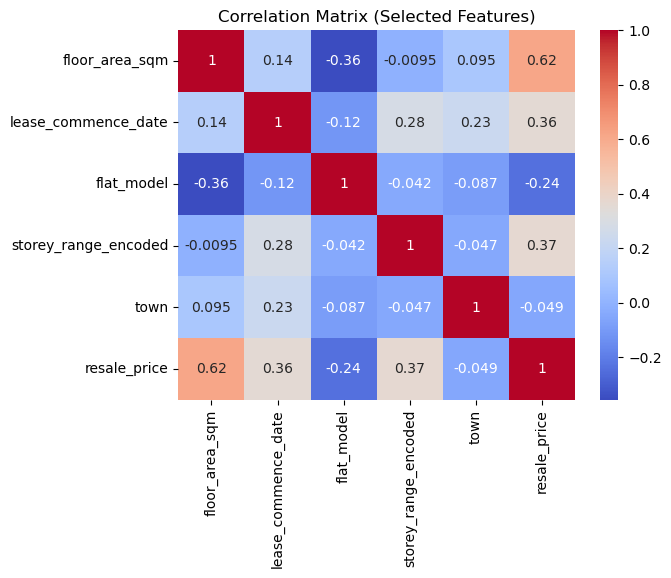

In [12]:
selected_columns = ['floor_area_sqm', 'lease_commence_date', 'flat_model', 'storey_range_encoded', 'town', 'resale_price']
selected_dataset = dataset[selected_columns]

# Calculate correlation matrix
corr_matrix_selected = selected_dataset.corr(numeric_only=True)

# Plotting the correlation matrix
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Selected Features)')
plt.show()


## Correlation results  

Based on the correlation matrix analysis, it appears that there are no strong correlations among the features, except for the moderate positive relationship between floor area and resale price. This suggests that all features may contribute to predicting resale prices and hence, it's reasonable to utilize all available features in our models.

Utilizing all features ensures that the model can capture any potential relationships or patterns present in the data, even if they are not strong correlations. This approach allows the models below to learn from all available information and make more accurate predictions.

# **Exploring Different Models with Data**


## Linear Regression

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate Linear Regression model
y_pred_linear = linear_model.predict(X_val)
mse_linear = mean_squared_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R^2 Score: {r2_linear}")

Linear Regression Results:
Mean Squared Error: 11389677794.549515
R^2 Score: 0.5668897540292837


## Evaluating Linear Regression with k-fold cross-validation

Cross-Validation R^2 Scores: [0.56115106 0.56086238 0.55472968 0.5593467  0.55936846]
R^2 Score After Cross-Validation: 0.55909165705131


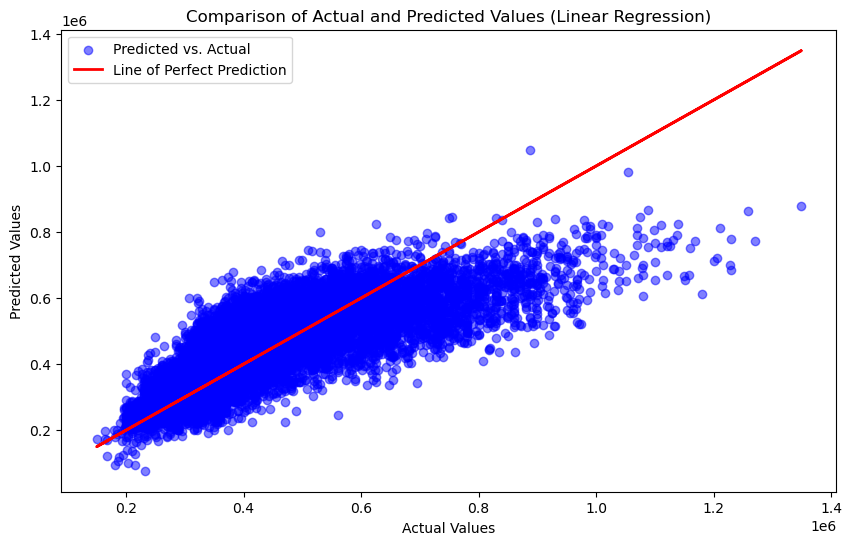

In [14]:
# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=k, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R^2 Scores:", cv_scores)
print("R^2 Score After Cross-Validation:", np.mean(cv_scores))

# Plotting for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_linear, color='blue', alpha=0.5, label='Predicted vs. Actual')  
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')  

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Linear Regression Analysis

The application of linear regression offers us a foundational understanding of the underlying factors influencing resale prices. With a mean squared error of approximately 11.4 billion and an R-squared score of around 0.567 on the validation set, the model demonstrates slightly less than average performance in capturing variations in resale prices. However, this performance indicates that while linear regression can explain a portion of the variance, it might not fully capture the complexity of the hdb market dynamics. The model's reliance on linear relationships between independent variables and the target variable may overlook nonlinear trends and interactions among features which limits its predictive capability.

Additionally, the k-fold cross-validation with five folds corroborates the model's consistency, with R-squared scores consistently hovering around 0.559 across different subsets of the training data. This stability suggests that the linear regression model generalizes reasonably well to unseen data, providing a degree of confidence in its predictive ability. However, it's essential to recognize the limitations of linear regression, such as its sensitivity to outliers and its assumption of independence among predictor variables. These limitations may hinder the model's performance in trying to capture the intricate dynamics of the HDB resale market, particularly in the presence of outliers or multicollinearity among features.

To enhance predictive accuracy and robustness, we will explore more advanced machine learning techniques, such as ensemble methods or nonlinear models like decision trees. These approaches have more flexibility in capturing complex relationships and interactions among features, potentially improving the model's ability to predict resale prices more accurately.

## Optimising Linear Regression with Grid Search

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimised Mean Squared Error: 11389677794.549515
Optimised R^2 Score: 0.5668897540292837


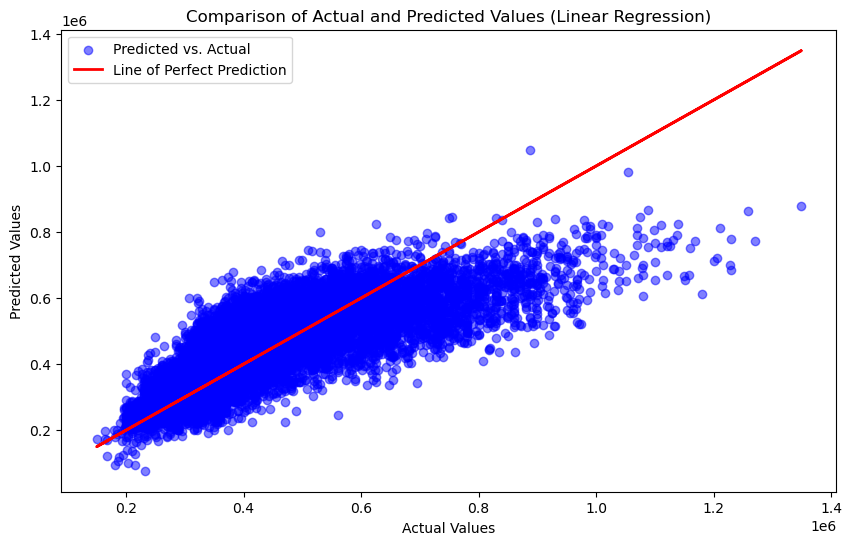

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Linear Regression model
linear_model = LinearRegression()

# Define the parameter grid to search over (no parameters to tune for Linear Regression)
param_grid = {}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(X_val)

# Calculate metrics
new_mse = mean_squared_error(y_val, y_pred)
new_r2 = r2_score(y_val, y_pred)

# Print the optimized results
print(f"Optimised Mean Squared Error: {new_mse}")
print(f"Optimised R^2 Score: {new_r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')
plt.title('Comparison of Actual and Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Optimising Linear Regression with Randomized Search

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimised Mean Squared Error: 11389677794.549515
Optimised R^2 Score: 0.5668897540292837


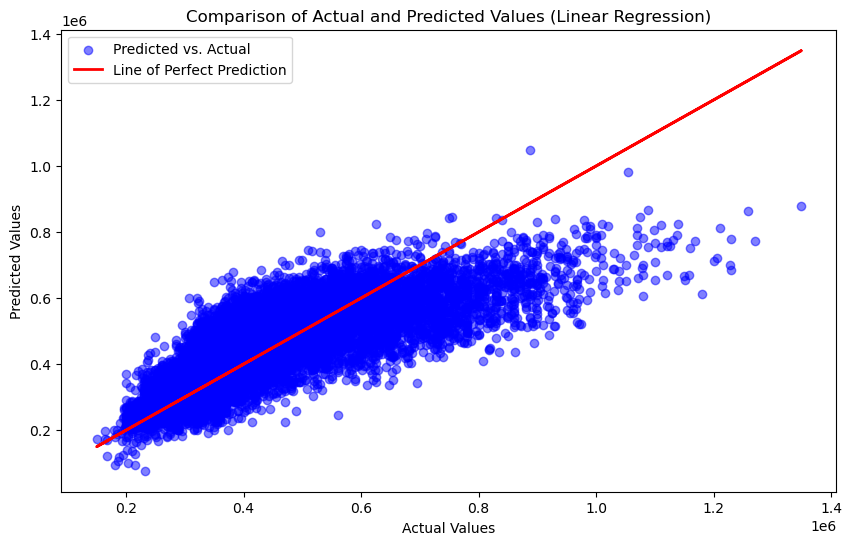

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Linear Regression model
linear_model = LinearRegression()

# Define the parameter distribution to search over (no parameters to tune for Linear Regression)
param_distributions = {}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=linear_model,
                                   param_distributions=param_distributions,
                                   n_iter=1,  # Number of parameter settings sampled (set to 1 since no parameters to tune)
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best estimator
best_model = random_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(X_val)

# Calculate metrics
new_mse = mean_squared_error(y_val, y_pred)
new_r2 = r2_score(y_val, y_pred)

# Print the optimized results
print(f"Optimised Mean Squared Error: {new_mse}")
print(f"Optimised R^2 Score: {new_r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')
plt.title('Comparison of Actual and Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Overall Linear Regression Analysis

In the case of linear regression, which relies on finding the best-fit line through the data based on feature coefficients estimated from the training data, grid search and randomized search may not yield significant improvements. Linear regression models are quite simple and have few hyperparameters to tune. 

Additionally, linear regression is less prone to overfitting due to its simplicity and inherent regularization which further diminishing the need for hyperparameter optimization techniques like grid search or randomized search. Hence, the effect of using both methods on linear regression models may be limited compared to more complex models.

## Random Forest

In [17]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print("Random Forest Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")

Random Forest Results:
Mean Squared Error: 2116090146.4163406
R^2 Score: 0.9195323748096563


## Evaluating Random Forest with k-fold cross validation

Cross-Validation R^2 Scores for Random Forest: [0.91721119 0.92030012 0.91652461 0.92031692 0.9216599 ]
R^2 Score After Cross-Validation: 0.9192025472754883


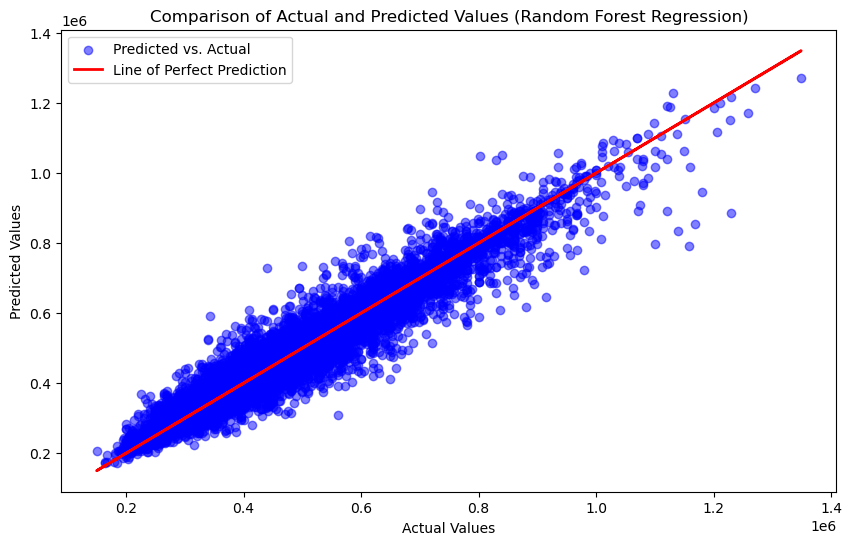

In [18]:
# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=k, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R^2 Scores for Random Forest:", cv_scores_rf)
print("R^2 Score After Cross-Validation:", np.mean(cv_scores_rf))

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_rf, color='blue', alpha=0.5, label='Predicted vs. Actual')  
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction') 

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Random Forest Analysis

The implementation of Random Forest regression presents a notable improvement in predictive performance compared to linear regression for estimating HDB resale flat prices. With a mean squared error of approximately 2.1 billion and an R-squared score of around 0.9195 on the validation set, this model demonstrates superior accuracy in capturing the variability of resale prices. This suggests that Random Forest offers a more nuanced understanding of the housing market dynamics, thereby enhancing predictive capability.

Furthermore, the k-fold cross-validation with five folds reaffirms the robustness of the Random Forest model, with consistently higher R-squared scores around 0.9192 across different subsets of the training data. This consistency highlights the model's reliability and generalizability to unseen data, indicating its potential utility as a predictive tool for HDB resale prices. However, it's essential to remain cognizant of potential overfitting and to monitor model performance on unseen data to ensure continuous relevance and accuracy.

## Optimising Random Forest with Grid Search

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Optimised Mean Squared Error: 1999798929.123705
Optimised R^2 Score: 0.9239545295566458


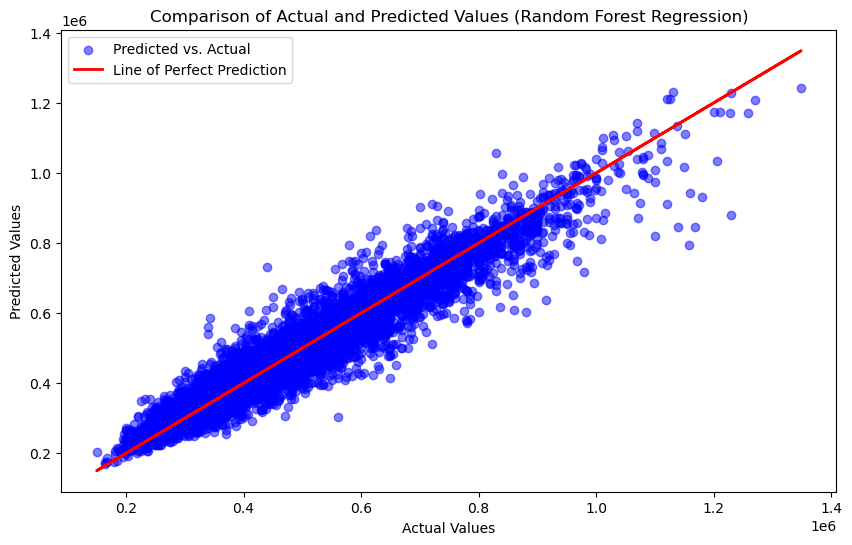

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print out the best parameters
print("Best parameters found: ", best_params)

# Use the best model to make predictions
y_pred = best_model.predict(X_val)

# Calculate metrics
new_mse = mean_squared_error(y_val, y_pred)
new_r2 = r2_score(y_val, y_pred)

# Print the optimized results
print(f"Optimised Mean Squared Error: {new_mse}")
print(f"Optimised R^2 Score: {new_r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')
plt.title('Comparison of Actual and Predicted Values (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Optimising Random Forest with Randomized Search

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Optimised Mean Squared Error: 2045165929.4292636
Optimised R^2 Score: 0.9222293786774263


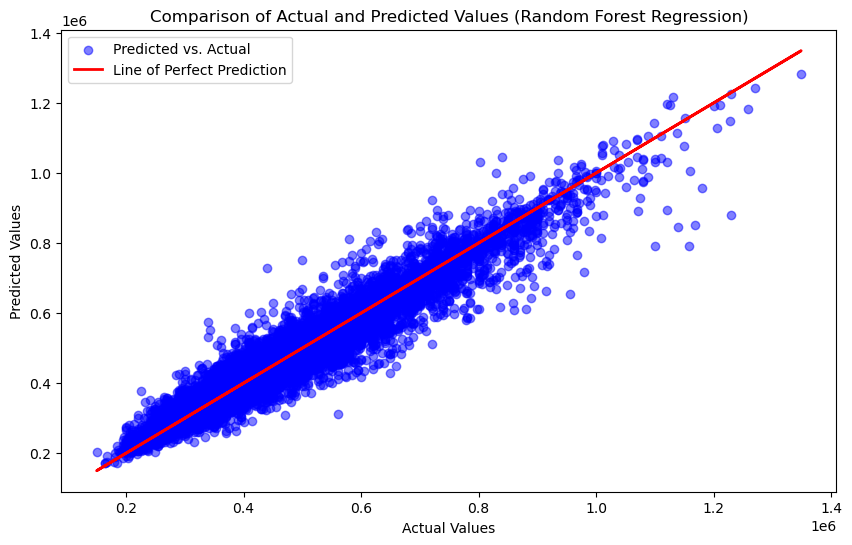

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Define the parameter distribution to search over
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=random_forest_model,
                                   param_distributions=param_distributions,
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print out the best parameters
print("Best parameters found: ", best_params)

# Use the best model to make predictions
y_pred = best_model.predict(X_val)

# Calculate metrics
new_mse = mean_squared_error(y_val, y_pred)
new_r2 = r2_score(y_val, y_pred)

# Print the optimized results
print(f"Optimised Mean Squared Error: {new_mse}")
print(f"Optimised R^2 Score: {new_r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')
plt.title('Comparison of Actual and Predicted Values (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Overall Random Forest Analysis
The utilization of Grid search and randomized search have led to a slight enhancement in the R-squared score. This improvement is attributed to the optimization of hyperparameters such as the number of estimators, maximum tree depth, and minimum samples per leaf. Through fine-tuning these parameters, the model becomes more adept at capturing intricate relationships within the dataset, thus facilitating more precise predictions of the target variable

## Decision Trees

In [21]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Evaluate Decision Tree model
y_pred_dt = decision_tree_model.predict(X_val)
mse_dt = mean_squared_error(y_val, y_pred_dt)
r2_dt = r2_score(y_val, y_pred_dt)

print("\nDecision Tree Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")


Decision Tree Results:
Mean Squared Error: 3209395272.673923
R^2 Score: 0.8779577437537129


## Evaluating Decision Tree with k-fold cross validation

Cross-Validation R^2 Scores for Decision Tree: [0.87070704 0.87713788 0.87155234 0.87344463 0.87806758]
R^2 After Cross-Validation: 0.874181893974149


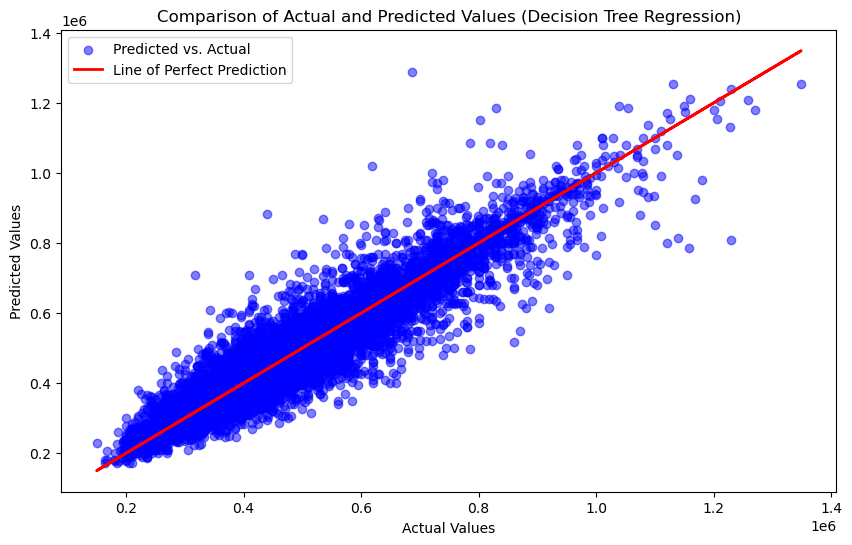

In [22]:
# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores_dt = cross_val_score(decision_tree_model, X_train, y_train, cv=k, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R^2 Scores for Decision Tree:", cv_scores_dt)
print("R^2 After Cross-Validation:", np.mean(cv_scores_dt))

# Plotting for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_dt, color='blue', alpha=0.5, label='Predicted vs. Actual')  
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')  

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values (Decision Tree Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Decision Tree Analysis 

The utilization of Decision Trees for predicting HDB resale flat prices provides comparable performance to Random Forest but lacks its ensemble learning advantages. With a mean squared error of approximately 3.2 billion and an R-squared score of around 0.878, this model demonstrates pretty solid predictive capability.

Similar to Random Forest earlier, the k-fold cross-validation with five folds reconfirms the robustness of the Decision Tree model, yielding consistent R-squared scores of around 0.874 across different subsets of the training data. This consistency suggests that Decision Trees generalize well to unseen data. However, it's important to acknowledge the shortcomings of Decision Trees, such as their susceptibility to high variance and their inability to capture complex relationships among features.

## Optimising Decision Tree with Grid Search

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimised Mean Squared Error: 2562736880.5557914
Optimised R^2 Score: 0.9025479367619244


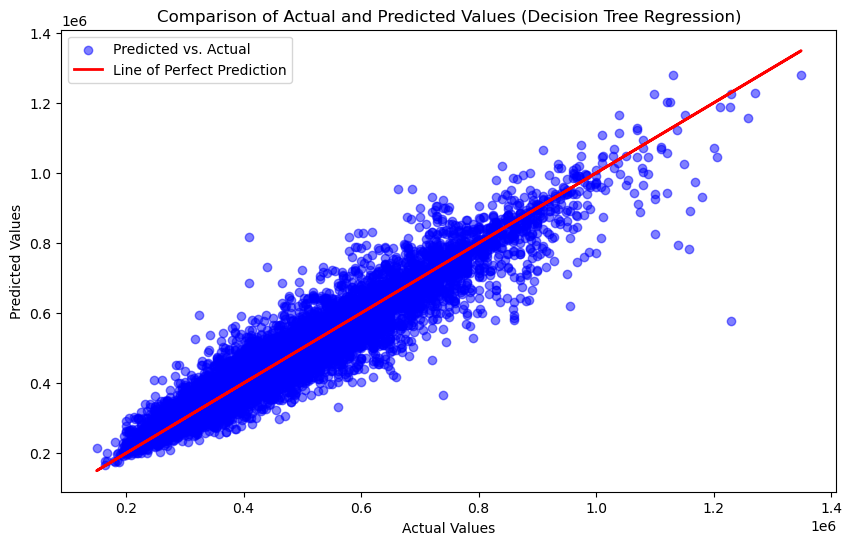

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model_dt = grid_search.best_estimator_
best_params_dt = grid_search.best_params_

# Print out the best parameters
print("Best parameters found: ", best_params_dt)

# Use the best model to make predictions
y_pred = best_model_dt.predict(X_val)

# Calculate metrics
new_mse = mean_squared_error(y_val, y_pred)
new_r2 = r2_score(y_val, y_pred)

# Print the optimized results
print(f"Optimised Mean Squared Error: {new_mse}")
print(f"Optimised R^2 Score: {new_r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')
plt.title('Comparison of Actual and Predicted Values (Decision Tree Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Optimising Decision Tree with Randomized Search

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 40}
Optimised Mean Squared Error: 2559729048.9472055
Optimised R^2 Score: 0.9026623142457595


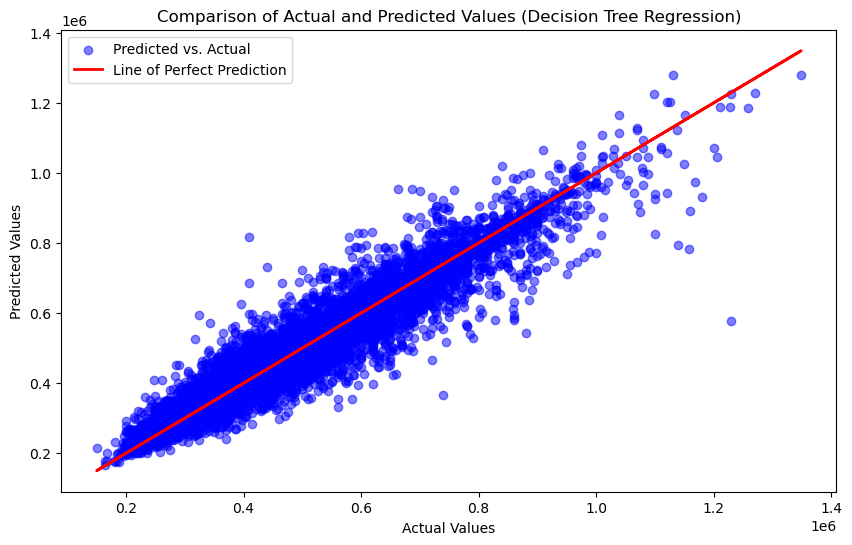

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define the parameter distribution to search over
param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=decision_tree_model,
                                   param_distributions=param_distributions,
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model_dt = random_search.best_estimator_
best_params_dt = random_search.best_params_

# Print out the best parameters
print("Best parameters found: ", best_params_dt)

# Use the best model to make predictions
y_pred = best_model_dt.predict(X_val)

# Calculate metrics
new_mse = mean_squared_error(y_val, y_pred)
new_r2 = r2_score(y_val, y_pred)

# Print the optimized results
print(f"Optimised Mean Squared Error: {new_mse}")
print(f"Optimised R^2 Score: {new_r2}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')
plt.title('Comparison of Actual and Predicted Values (Decision Tree Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Overall Decision Tree Analysis

After utilizing grid search and randomized search, there is an increase in performance that surpasses both the Linear Model and Random Forest. This enhancement stems from the ability of both methods to explore a wide range of hyperparameters which allows the Decision Tree model to find an optimal configuration that better fits the training data and also generalize well to unseen data. 

Furthermore, the Decision Tree model is flexible in capturing non-linear relationships and interactions among features which makes it more responsive to hyperparameter tuning, causing a more significant improvement in performance compared to the other 2 models mentioned earlier.

In [26]:
print(X_train.head(10))

        town  flat_model  floor_area_sqm  remaining_lease_months
57325     13           7           149.0                     778
42417      5           5           124.0                     939
35272      7           5            53.0                     621
5572      21           5           122.0                     833
104548     8           8            93.0                    1144
98479     20           5           121.0                     926
14604     20           8            67.0                    1142
68182      5           8            68.0                    1137
14945     24           8           111.0                     932
91500     18          17           117.0                     635


## Support Vector Machine (SVM)


Support Vector Machine Results (Small Dataset):
Mean Squared Error: 25883316894.52642
R^2 Score: 0.016887701725183613
Cross-Validation R^2 Scores for SVM (Small Dataset): [0.00530039 0.00135086 0.00482241]
R^2 After Cross-Validation (Small Dataset): 0.0038245506397956985


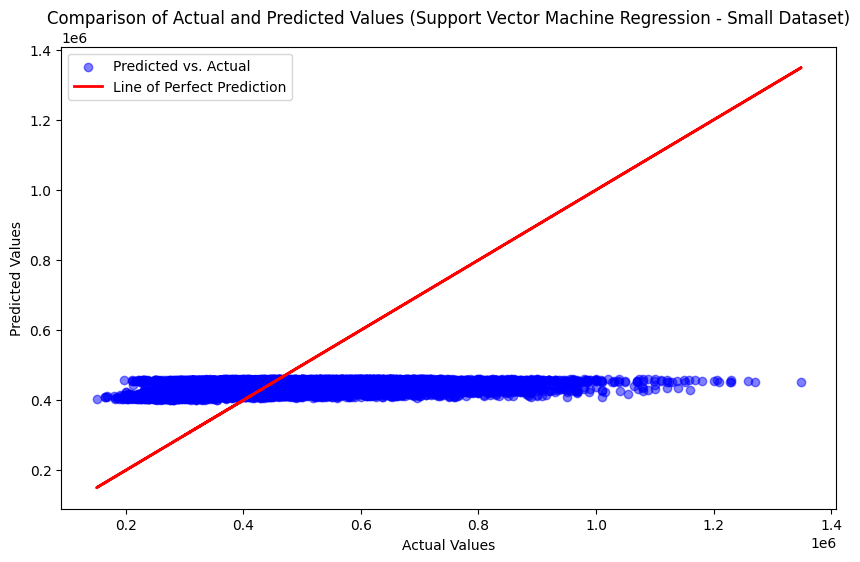

In [16]:
# Reduce the size of the dataset for quicker testing
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.01, random_state=42)
X_val_small, _, y_val_small, _ = train_test_split(X_val, y_val, test_size=0.01, random_state=42)

# Initialize the SVM regressor
svm_regressor = SVR(kernel='rbf', C=10)

# Train the SVM regressor with the smaller dataset
svm_regressor.fit(X_train_small, y_train_small)

# Predict the target values for the smaller validation set
y_pred_svm_small = svm_regressor.predict(X_val_small)

# Evaluate SVM regressor
mse_svm_small = mean_squared_error(y_val_small, y_pred_svm_small)
r2_svm_small = r2_score(y_val_small, y_pred_svm_small)

print("\nSupport Vector Machine Results (Small Dataset):")
print(f"Mean Squared Error: {mse_svm_small}")
print(f"R^2 Score: {r2_svm_small}")

# Perform k-fold cross-validation with a smaller dataset
k_small = 3  # Reduced number of folds
cv_scores_svm_small = cross_val_score(svm_regressor, X_train_small, y_train_small, cv=k_small, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R^2 Scores for SVM (Small Dataset):", cv_scores_svm_small)
print("R^2 After Cross-Validation (Small Dataset):", np.mean(cv_scores_svm_small))

# Plotting for Support Vector Machine Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val_small, y_pred_svm_small, color='blue', alpha=0.5, label='Predicted vs. Actual')  
plt.plot(y_val_small, y_val_small, color='red', linewidth=2, label='Line of Perfect Prediction')  

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values (Support Vector Machine Regression - Small Dataset)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()


## Gradient Boosting Model (Ada Boost)


ADA Boost Results:
Mean Squared Error: 16894342910.371605
R^2 Score: 0.35756628541974655


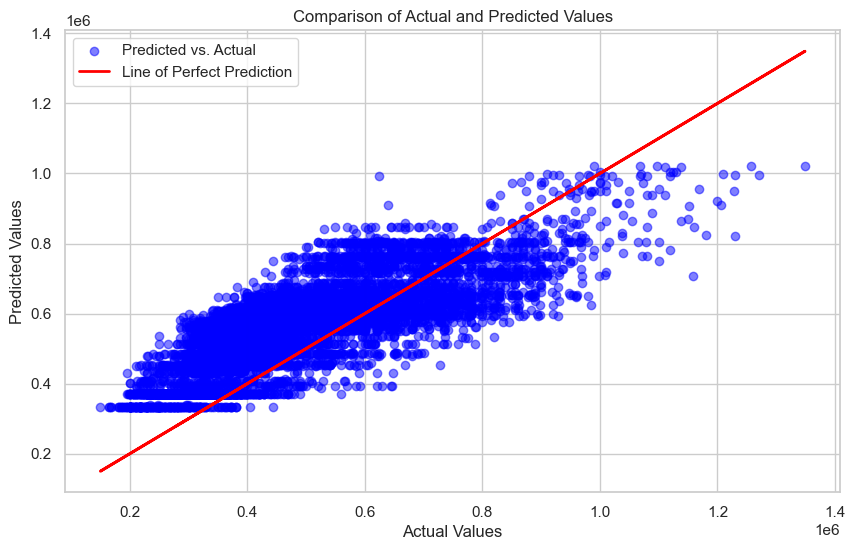

In [17]:
ada_regressor = AdaBoostRegressor(random_state=42, n_estimators=50)
ada_regressor.fit(X_train, y_train)

y_pred = ada_regressor.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nADA Boost Results:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Setting up the visual style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')  # Scatter plot for actual vs predicted
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')  # Line for perfect predictions

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Optimising ADA Boost with Grid Search

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}
Optimised R^2 Score: 0.5628275309258183
Optimised MSE: 11496503741.773064


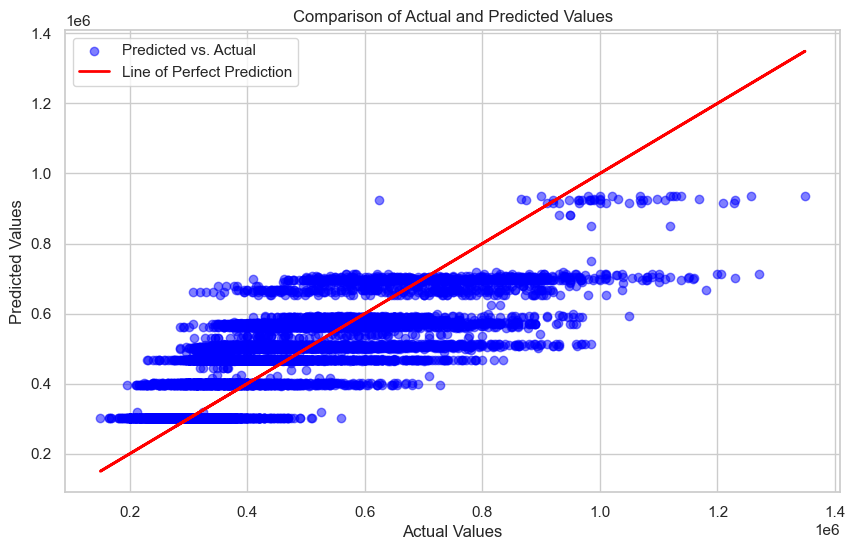

In [18]:
ada_regressor = AdaBoostRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1],  # Weight applied to each classifier at each boosting iteration
    'loss': ['linear', 'square', 'exponential']  # The loss function to use when updating weights
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=ada_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print out the best parameters
print("Best parameters found: ", best_params)

# Use the best model to make predictions
y_pred = best_model.predict(X_val)

new_r2 = r2_score(y_val, y_pred)
new_mse = mean_squared_error(y_val, y_pred)

# Print the results
print(f"Optimised R^2 Score: {new_r2}")
print(f"Optimised MSE: {new_mse}")

# Setting up the visual style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')  # Scatter plot for actual vs predicted
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')  # Line for perfect predictions

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Ada Boost Analysis


Upon the initial fitting of the ADA Boost, the results are quite neglible, the mean squared error (MSE)is 17 billion, which is extraordinarily high. Furthermore, the the initial R^2 score is 0.357, suggesting that only about 36% of the variability in your response variable can be explained by the model. These 2 results suggests that the current model cannot be used as an accurate fit for our research. In order to improve the results, we decided to use hyperparameter tuning through the use of GridSearch to optimise our results.

With regards to the parameters we used in GridSearch, we tried to balance between underfitting and overfitting, thus the range of values of "n_estimators", with a low "learning_rate" as well to increase the accuracy of the model, which is all done to minimise the MSE. After the use of GridSearch, the performance of the model increased greatly, with a new R^2 score of 0.563 and a new MSE of 11.5 billion. However, the performance is still relatively inaccurate, hence we will not be using this model for our predictions. 

Furthermore, the time it takes to run the model is extremely long as well, which is why we will try using other hyperparameter tuning methods, such as randomised search, to help optimise the time complexity without compromising the performance.

## Ada Boost (Randomized Search)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.05}
Optimised Mean Squared Error: 11421144073.597939
Optimised R^2 Score: 0.565693199736504


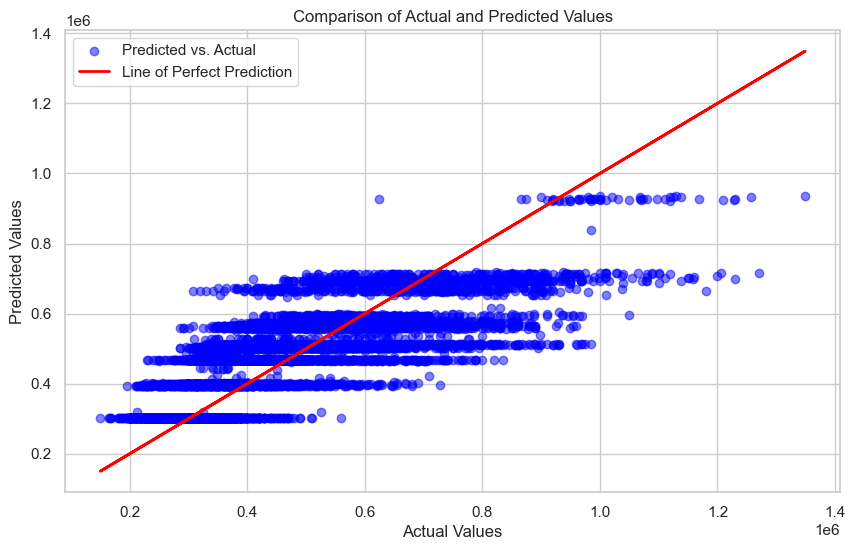

In [19]:
ada_regressor = AdaBoostRegressor(random_state=42)

# Define the parameter distribution to search over
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'loss': ['linear', 'square', 'exponential']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ada_regressor,
                                   param_distributions=param_distributions,
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=3,       # 3-fold cross-validation
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print out the best parameters
print("Best parameters found: ", best_params)

# Use the best model to make predictions
y_pred = best_model.predict(X_val)

# Calculate the new R^2 score
new_r2 = r2_score(y_val, y_pred)
new_mse = mean_squared_error(y_val, y_pred)

# Print the optimized results
print(f"Optimised Mean Squared Error: {new_mse}")
print(f"Optimised R^2 Score: {new_r2}")

# Setting up the visual style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')  # Scatter plot for actual vs predicted
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')  # Line for perfect predictions

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Overall Ada Boost Analysis

After using RandomisedSearch, the performance of the model is actually more accurate, with a better R^2 score of 0.566, and a better MSE of 11.4 billion as well. However, it is much better than GridSearch in terms of the time taken for the model, but similarly as mentioned earlier, the performance of the model still leaves much to be desired. Hence, we will be looking at other gradient boosting models to see if we can get a better performing model.

## Gradient Boosting Model (Gradient Boosting Regressor)


GBR results:
Mean Squared Error: 5149340735.649599
R^2 Score: 0.8041882946266051


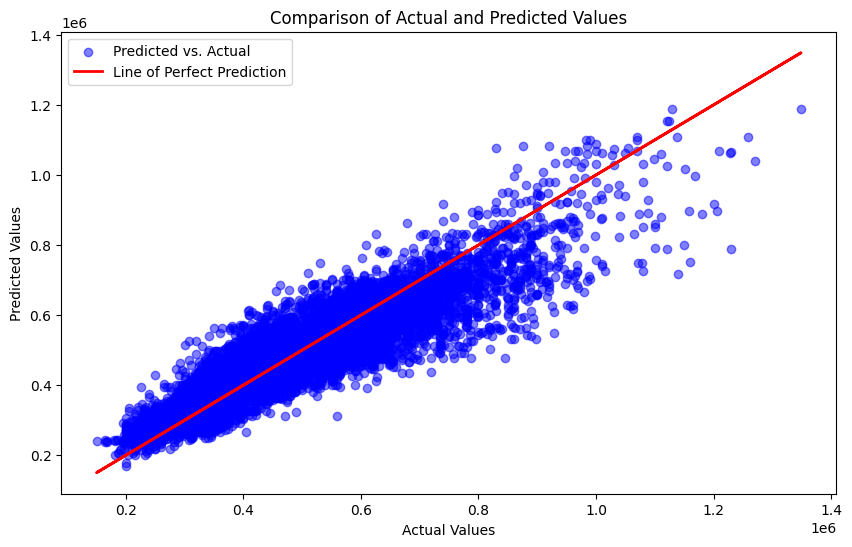

In [11]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nGBR results:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')  # Scatter plot for actual vs predicted
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')  # Line for perfect predictions

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Optimising GBR with GridSearch

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Optimised R^2 Score: 0.9097367340896001
Optimised MSE: 2373690128.4776115


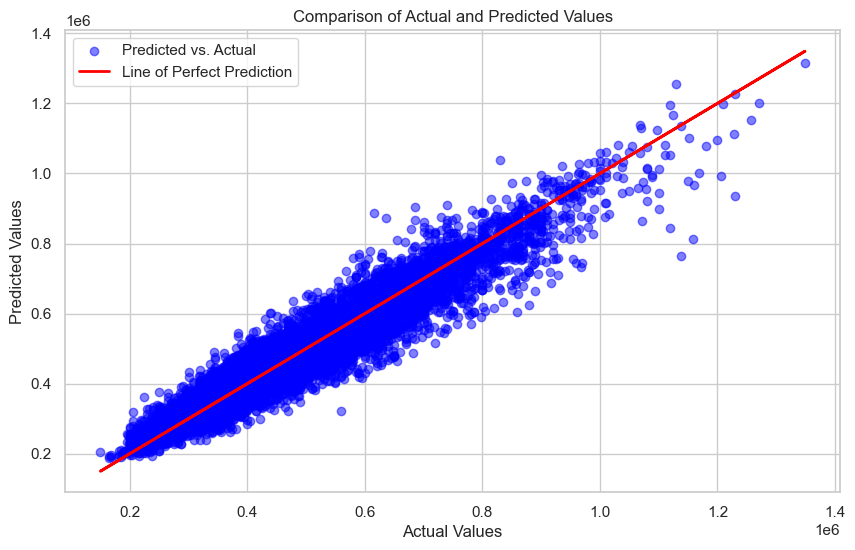

In [21]:
gbr = GradientBoostingRegressor(random_state=42)

# Define the scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring=mse_scorer, cv=5, n_jobs=-1, verbose=1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

new_r2 = r2_score(y_val, y_pred)
new_mse = mean_squared_error(y_val, y_pred)


# Print the results
print(f"Optimised R^2 Score: {new_r2}")
print(f"Optimised MSE: {new_mse}")

# Setting up the visual style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')  # Scatter plot for actual vs predicted
plt.plot(y_val, y_val, color='red', linewidth=2, label='Line of Perfect Prediction')  # Line for perfect predictions

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Gradient Boosting Regressor Analysis

Unlike the performance of the ADA Boost Model, the use of the Gradient Boosting Regressor (GBR) model proves a much more accurate performance, with a MSE of 5.15 billion and a R^2 score of 0.804. Even before the use of optimisation methods, the model already has a much better performance than ADA Boost. However, when we try to optimise GBR using hyperparameter tuning methods such as GridSearch, the time taken to run the model is much worse compared to ADA Boost. Although the R^2 and MSE do improve after hyperparameter tuning, we use the same approach as before, and change from using GridSearch to Randomised Search.

## Optimising GBR using RandomisedSearch

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Optimized MSE: 2362283819.504318
Optimized R^2 Score: 0.910170476762058


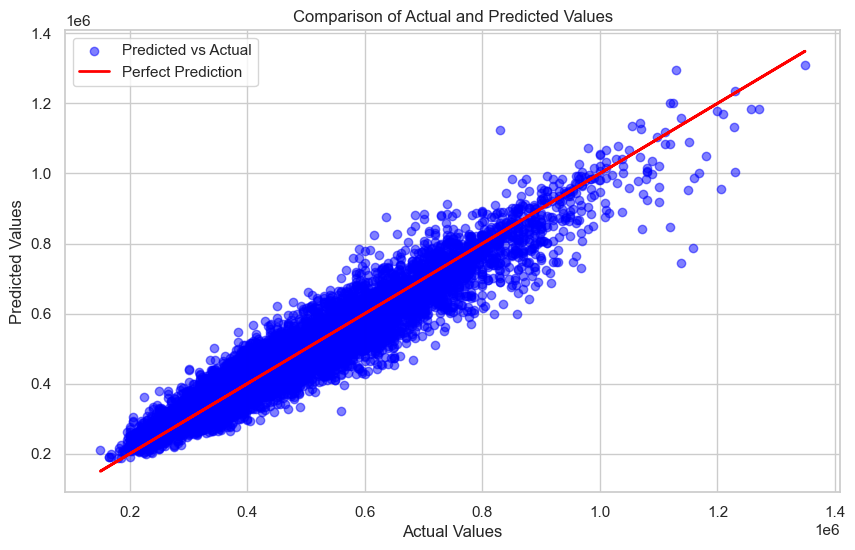

In [12]:
gbr = GradientBoostingRegressor(random_state=42)
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Define the scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_distributions,
    n_iter=30,  # Number of parameter settings sampled
    scoring=mse_scorer,
    cv=3,       # 3-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model_gbr = random_search.best_estimator_
y_pred = best_model_gbr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Optimized MSE:", mse)
print("Optimized R^2 Score:", r2)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot(y_val, y_val, color='red', linewidth=2, label='Perfect Prediction')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Overall GBR Analysis

After making the swap to RandomisedSearch, unlike ADA boost, the MSE and R^2 are not exactly the same. However, the improvements made are still very noticeable, with the MSE being 2.36 billion and the new R^2 being 0.910. With this, the model's performance is well within an accurate range.

## Model Comparison

Among the various models evaluated for predicting HDB resale flat prices, the Gradient Boosting Regressor emerges as the most promising choice, exhibiting superior performance in terms of Mean Squared Error (MSE) and predictive accuracy. With a significantly lower MSE compared to other models like Linear Regression and Ada Boost, the Gradient Boosting Regressor demonstrates its ability to provide more precise estimations of resale flat prices. 

Additionally, its higher R-squared score highlights its effectiveness in capturing complex relationships within the dataset, suggesting that it can better explain the variability in resale prices than the other models. This enhanced predictive capability is crucial for researchers who are keeping track of HDB resale market, providing them with more reliable insights for decision-making.

# **Adding Extra Features to our Resale Flat Prices Dataset**

To enhance our Resale Flat Prices Dataset and improve the predictive capabilities of our machine learning models, we have decided to introduce extra location-based and infrastructure features that we feel are meaningful. These additions aim to possibly help our machine learning models predict prices better. 

>We will be exploring 3 different features:
1. `Distance to nearest MRT`
2. `Number of nearby Schools` 
3. `Number of Hawker Centres in the vicinity`


## Utilising the distance from MRT to HDB to predict resale prices

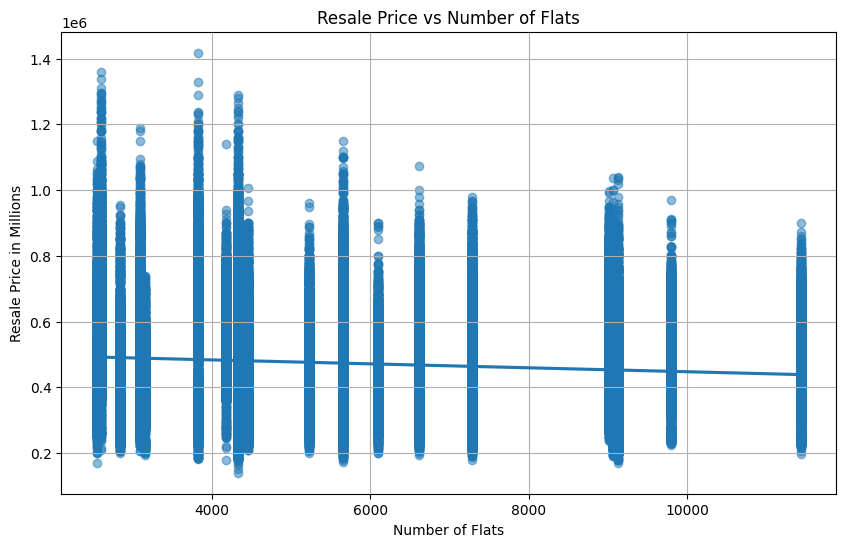

In [15]:
# Read the HDB resale dataset
hdb_dataset = pd.read_csv(r"../CS3244-Machines-That-Learn/Dataset/resale_flat.csv")

# Read the MRT/LRT station dataset
mrt_dataset = pd.read_csv(r"../CS3244-Machines-That-Learn/Dataset/mrt_lrt_data.csv")
#hdb_dataset = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\resale_flat.csv")
#mrt_dataset = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\mrt_lrt_data.csv")

# Convert the station names in the MRT/LRT station dataset to all capital letters
mrt_dataset['station_name'] = mrt_dataset['station_name'].str.upper()

# Merge the HDB resale dataset with the MRT/LRT station dataset based on the town name
merged_dataset = pd.merge(hdb_dataset, mrt_dataset, left_on='town', right_on='station_name', how='left')

# Group the merged dataset by the station name and count the number of flats in each group
station_counts = merged_dataset.groupby('station_name').size().reset_index(name='Number of Flats')

# Merge the station counts with the original MRT/LRT station dataset to include stations with zero flats
mrt_dataset_with_counts = pd.merge(mrt_dataset, station_counts, on='station_name', how='left')

# Fill missing values in the "Number of Flats" column with zero
mrt_dataset_with_counts['Number of Flats'].fillna(0, inplace=True)

# Merge the MRT/LRT station dataset with the HDB resale dataset based on the town name
hdb_dataset_with_counts = pd.merge(hdb_dataset, mrt_dataset_with_counts[['station_name', 'Number of Flats']], left_on='town', right_on='station_name', how='left')

# Drop the redundant "station_name" column
hdb_dataset_with_counts.drop(columns=['station_name'], inplace=True)

# Plotting with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Number of Flats', y='resale_price', data=hdb_dataset_with_counts, scatter_kws={'alpha':0.5})
plt.title('Resale Price vs Number of Flats')
plt.xlabel('Number of Flats')
plt.ylabel('Resale Price in Millions')
plt.grid(True)
plt.show()


In our efforts to enhance the predictive power of our HDB resale dataset, we introduced an extra feature called 'Number of Flats'. This feature aims to quantify the density of hdb units in proximity to designated MRT stations, offering insights into the housing landscape's relationship with transportation infrastructure. To achieve this, we integrated an additional dataset containing MRT station information from kaggle, including the station names, which align with the town column in our HDB dataset.

Upon merging both datasets, we conducted a thorough analysis by plotting the resale_price against the number of flats. Surprisingly, our findings revealed a negative linear relationship between these variables. As the number of flats near the MRT station increases, the resale price of the flats tends to decrease. This counterintuitive observation challenges our initial assumptions, as conventional wisdom would suggest that being near to an MRT station enhances a property's value due to the convenience it offers for transportation.

Beyond this module, we could delve deeper to understand the underlying factors contributing to this phenomenon. Potential considerations include the quality of amenities, neighborhood demographics, and infrastructure developments. By delving deeper into these aspects, we can potentially uncover hidden dynamics driving housing prices in proximity to MRT stations.

## Utilising the number of nearby primary schools to predict resale prices


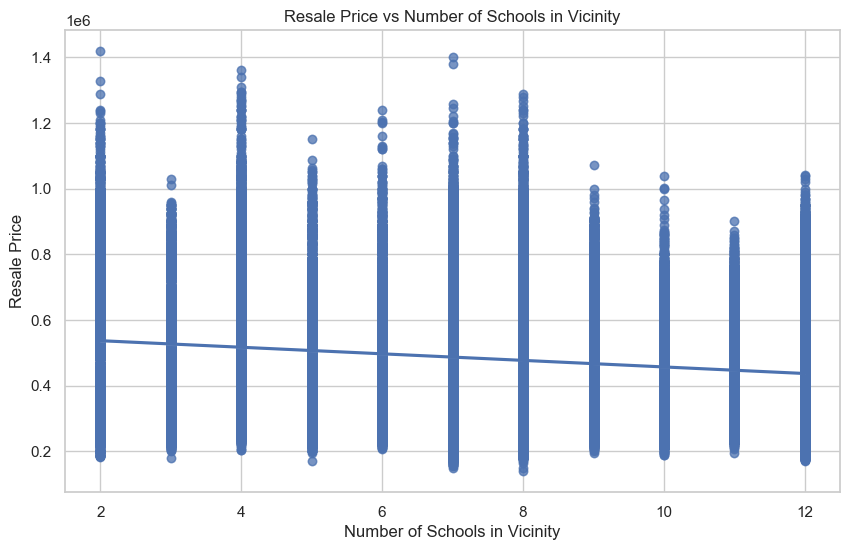

In [ ]:
pri_school_data = pd.read_csv(r"../CS3244-Machines-That-Learn/Dataset/pri_sch_clean.csv")
hdb_data = pd.read_csv(r"../CS3244-Machines-That-Learn/Dataset/resale_flat.csv")
#pri_school_data = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\pri_sch_clean.csv")
#hdb_data = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\resale_flat.csv")
hdb_data['town'] = hdb_data['town'].str.upper()
pri_school_data['Area'] = pri_school_data['Area'].str.upper()

# Count the number of primary schools in each area
school_count = pri_school_data.groupby('Area').size().reset_index(name='school_count')

# Merge the school count with the HDB data
hdb_data = pd.merge(hdb_data, school_count, left_on='town', right_on='Area', how='left')


plt.figure(figsize=(10, 6))
plt.scatter(hdb_data['school_count'], hdb_data['resale_price'], alpha=0.5)
sns.regplot(x='school_count', y='resale_price', data=hdb_data, scatter_kws={'alpha':0.5})
plt.title('Resale Price vs Number of Schools in Vicinity')
plt.xlabel('Number of Schools in Vicinity')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

Similarly, we introduced an extra feature called 'school_count', which quantified the number of schools in any chosen vicinity. This feature was chosen as the many individuals looking to buy flats come from families, who may or may not have children. Therefore, the presence of schools in the vicinity may affect an individual's decision to purchase the flat, in turn altering the resale price. This feature aims to quantify the number of primary schools in proximity to the desginated HDB flats, offering insights into the housing landscape's relationship with the education infrastructure. To achieve this, we integrated an additional dataset containing primary school  information, including the primary school names and the towns, which align with the town column in our HDB dataset.

Upon merging both datasets, we conducted a thorough analysis by plotting the resale_price against the number of primary schools in the vicinity. Surprisingly, our findings revealed a weak negative linear relationship between these variables. As the number of primary schools in the vicinity increases, the resale price of the flats tends to decrease. This counterintuitive observation challenges our initial assumptions, as conventional wisdom would suggest that being near multiple primary schools would enhances a property's value due to the convenience it offers for education.

One of the reasons this may happen is the noise level that is caused by primary schools. Having many primary schools in the vicinity will definitely result in families complaining about the rising noise levels. However, this is just an assumption of a hypothesis, and beyond this module, we could delve deeper to understand the underlying factors contributing to this phenomenon. 

## Utilising the number of Hawker Centres in the same Town to predict resale prices

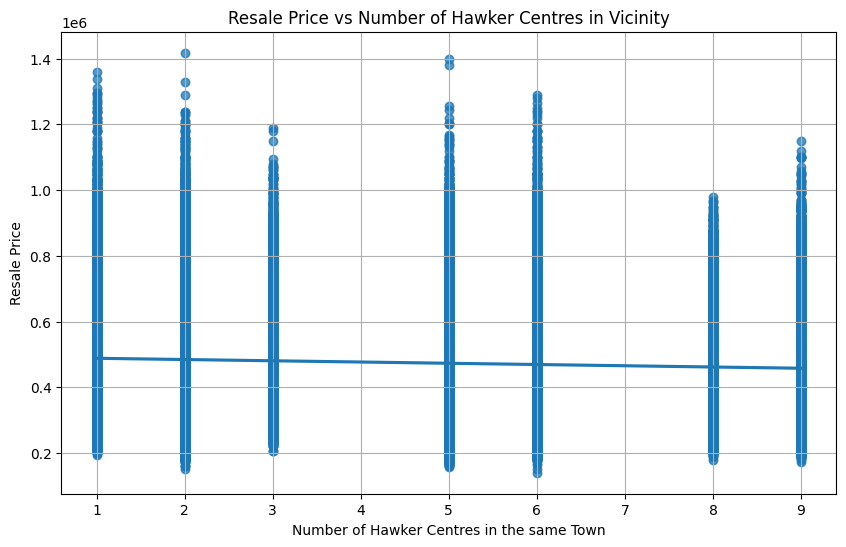

In [128]:
# Read the data
hdb_data = pd.read_csv(r"../CS3244-Machines-That-Learn/Dataset/resale_flat.csv")
hawker_data = pd.read_csv(r"../CS3244-Machines-That-Learn/Dataset/hawker_centres.csv") 
#hdb_data = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\resale_flat.csv")
#hawker_data = pd.read_csv(r"..\CS3244-Machines-That-Learn\Dataset\hawker_centres.csv") 

# Count the number of hawker centres in each area   
# 'town' column manually added in excel
hawker_count = hawker_data.groupby('town').size().reset_index(name='hawker_count')

# Merge the hawker centre count with the HDB data
hdb_data = pd.merge(hdb_data, hawker_count, left_on='town', right_on='town', how='left')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(hdb_data['hawker_count'], hdb_data['resale_price'], alpha=0.5)
sns.regplot(x='hawker_count', y='resale_price', data=hdb_data, scatter_kws={'alpha':0.5})
plt.title('Resale Price vs Number of Hawker Centres in Vicinity')
plt.xlabel('Number of Hawker Centres in the same Town')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

Hawker centres are often considered as essential amenities in residential areas, providing convenient and affordable dining options for residents. The presence of hawker centres nearby can enhance the overall livability of an area, which can positively influence property prices.

Thus, we decided to include the number of hawker centres in the same town, believing it will be a meaningful feature. After conducting analysis, we discovered that the greater the number of hawker centres in a particular town, the lower the prices of the resale flats. This trend may stem from the fact that hawker centres tend to be prevalent in areas catering to lower-income families, where property prices are generally more affordable. Conversely, neighborhoods dominated by private estates or condominiums often have fewer hawker centres. 

However, considering that towns vary in size, it may not be entirely accurate to group these hawker centres by 'towns' as it is very general. To further improve accuracy and prediction, we propose a refinement: utilizing the distances between hawker centres and resale flat locations by leveraging their respective longitude and latitude coordinates. By doing so, we can redefine our feature to reflect the number of hawker centres in the vicinity, improving accuracy and enhancing the performance of our predictive model.


## Predicting actual data (GBR Model)

In [37]:
print(dataset.iloc[100])

month                                2017-01
town                                       1
flat_type                             4 ROOM
block                                    142
street_name               BEDOK RESERVOIR RD
storey_range                        07 TO 09
floor_area_sqm                          84.0
flat_model                                16
lease_commence_date                     1986
remaining_lease           68 years 10 months
resale_price                        395000.0
remaining_lease_months                   826
storey_range_encoded                     8.0
Name: 100, dtype: object


In [36]:
def predict_home_prices(town, flat_model, floor_area_sqm, remaining_lease_months, storey_range_encoded):
    """
    Predicts home prices based on the model's learned patterns from the training data.

    Parameters:
    town (int or list): The town code(s).
    flat_model (int or list): The flat model code(s).
    floor_area_sqm (float or list): The floor area in square meters.
    remaining_lease_months (int or list): The number of remaining lease months.

    Returns:
    np.array: Predicted home prices.
    """
    # Prepare the data as a DataFrame to match the input the model expects
    data = {
        'town': town,
        'flat_model': flat_model,
        'floor_area_sqm': floor_area_sqm,
        'remaining_lease_months': remaining_lease_months,
        'storey_range_encoded': storey_range_encoded
    }
    X_new = pd.DataFrame(data)
    
    # Predict using the model
    predictions = best_model_gbr.predict(X_new)
    return predictions

# Example usage of the function:
# The following inputs should be replaced with the actual values you want to predict
example_town = [1, 23, 3]
example_flat_model = [16, 5, 8]
example_floor_area_sqm = [84.0, 66.0, 102.0]
example_remaining_lease_months = [826, 631, 960]
example_storey_range_encoded = [8,11,5]

predicted_prices = predict_home_prices(example_town, example_flat_model, example_floor_area_sqm, example_remaining_lease_months, example_storey_range_encoded)
actual_home_price = [395000.00,268000.00,450000]
print("Predicted home prices:", predicted_prices)
print(f"Actual home price: {actual_home_price}")

Predicted home prices: [388307.69913869 270851.19851865 418133.6924642 ]
Actual home price: [395000.0, 268000.0, 450000]


# **Future Works**



In the future, there are some aspects that we would like to explore.

1. >`Spatial Analysis`

Explore spatial relationships and patterns by incorporating geospatial data. This includes analyzing the influence of neighborhood characteristics, such as proximity to city centers, access to green spaces, and neighborhood demographics, on resale flat prices.

2. >`Temporal Analysis`

Consider temporal aspects by incorporating time-series data. This could involve analyzing trends and seasonality in resale flat prices, as well as incorporating historical data to predict future price movements

3. >`Neighborhood Segmentation`

 Explore clustering techniques to identify distinct neighborhood segments based on various attributes such as socioeconomic status, infrastructure, amenities, and population density. This can provide deeper insights into how different types of neighborhoods impact resale flat prices.

4. >`Quality of Life Indicators`

Integrate indicators of quality of life, such as air quality, noise pollution levels, access to green spaces, and crime rates, into the model. These factors contribute to residents' overall well-being and can impact the perceived value of residential properties.

5. >`Future Development Plans`

 Incorporate information about future development plans and infrastructure projects in the area, such as new transportation hubs, commercial developments, or urban renewal initiatives. Anticipated improvements or developments can influence buyer perceptions and resale flat prices.

 
**After thoughts**

- The approach for the classification of broader flat models can be more mathematical/quantitative instead of qualitative (currently). For example, categorise flat models into distinct groups based on the median price of each specific flat model.

- Compute the travel time instead of the geodesic distance between two points, as travel time may offer greater accuracy. For instance, even if the geodesic distance between two coordinates is 1 kilometer, the time required to cover the same distance might vary compared to another 1-kilometer stretch between different coordinates. Future improvements could explore utilising Google Maps to calculate travel time between two coordinates and extract this data through web scraping.

- The influence of amenities on housing prices is dependent on their construction timing. Newly built facilities/amenities after HDB resale flat sales should not have any impact on its resale price. To address this in future iterations of this project, it would be useful to consider construction timelines when computing distances to the nearest amenities and number of amenities. However, handling data across different time periods is challenging and may be infeasible at times. Another approach could be the use of a weighted loss function during model training. This approach although attempted in our project, can be done on a larger scale by tuning a larger range of different weights applied for different time periods in our dataset with cross-validation.

- A collaborative approach involving the combination of a HDB Resale Flat Price prediction model with time series forecasting to anticipate the future values of a specific type of property. For example, if a person wants to know how much his/her property will be valued in 5 years time, one can use the HDB Resale Flat Price prediction model combined with the time series model for prediction.

- Experiment with training the regression model exclusively on more recent data (e.g. 2010 onwards) and then prioritising the prediction of future prices (e.g. 2020 onwards). Compare with current model and see which one performs better.
